# Comparing Accuracy for Training and Test Datasets

注意：このノートブックはGPUの有無に関わらずPython 3.x および　TensorFlow 2.x（ないしTensorFlow 1.x） にて、オフラインにて稼動するよう変更しています。<br>
Google Colab環境にてオンラインで実行する場合、オリジナルサイトのコードを使って下さい。<br>
2020/02/04: By H.Nishiyama<br>
2021/10/19 追加・変更部分のみ日本語化<br>
2021/11/17 コメント修正<br>

このノートブックはTensorFlow 2.x (ないし1.x）を使います<br>
*もし、オンラインのCloabシステムを使うなら、オリジナルサイトのコードを使うか、セルを指示通りに修正して下さい。<br>
【オリジナルサイト】https://github.com/enakai00/colab_tfbook

In [1]:
###%tensorflow_version 2.x

####[CAT-01]
Import modules and set a random seed.

In [2]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

np.random.seed(20190825)
#--- For TensorFlow 1.x, use the following line, but if you use TensorFlow2.x, you need to comment it out..
###tf.random.set_random_seed(20190825)
#--- For TensorFlow 2.x, use following line, instead of upper line.
tf.random.set_seed(20190825)

####[CAT-02]
Generate a dateset and split them into training(80%) and test datasets(20%).

In [3]:
n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

####[CAT-04]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [4]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values
test_x = test_set[['x1', 'x2']].values
test_t = test_set['t'].values

####[CAT-05]
Define a model to predict the probability of `t=1`.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ... 

In [5]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,),
                       name='logistic_regression'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
logistic_regression (Dense)  (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


####[CAT-06]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ... 

In [6]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['acc'])

####[CAT-07]
Apply the optimization for 10 epochs.

In [7]:
history = model.fit(train_x, train_t,
                    validation_data=(test_x, test_t),
                    batch_size=len(train_x), epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 12.6925 - acc: 0.5607 - val_loss: 10.4913 - val_acc: 0.6107
Epoch 2/10
1/1 [==============================] - 0s 39ms/step - loss: 12.6752 - acc: 0.5607 - val_loss: 10.4768 - val_acc: 0.6107
Epoch 3/10
1/1 [==============================] - 0s 27ms/step - loss: 12.6578 - acc: 0.5607 - val_loss: 10.4624 - val_acc: 0.6107
Epoch 4/10
1/1 [==============================] - 0s 28ms/step - loss: 12.6405 - acc: 0.5607 - val_loss: 10.4479 - val_acc: 0.6107
Epoch 5/10
1/1 [==============================] - 0s 26ms/step - loss: 12.6232 - acc: 0.5607 - val_loss: 10.4334 - val_acc: 0.6107
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 12.6059 - acc: 0.5607 - val_loss: 10.4189 - val_acc: 0.6107
Epoch 7/10
1/1 [==============================] - 0s 27ms/step - loss: 12.5886 - acc: 0.5607 - val_loss: 10.4044 - val_acc: 0.6107
Epoch 8/10
1/1 [==============================] - 0s 24ms/step - loss: 12.5713 - acc:

####[CAT-08]
Apply the optimization for additional 5,000 epochs.

In [8]:
history = model.fit(train_x, train_t,
                    validation_data=(test_x, test_t),
                    batch_size=len(train_x), epochs=5000, verbose=0)

####[CAT-09]
Plot a chart to compare the accuracy for training and test datasets.

<AxesSubplot:>

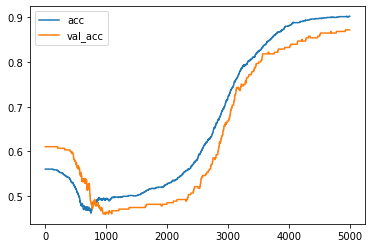

In [9]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()